In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import datetime
from sklearn.preprocessing import LabelEncoder
#한글깨짐방지
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
path = './data/'
train = pd.read_csv(path +'201901-202003.csv')
submission = pd.read_csv(path + 'submission.csv')

### 2020-07-27 15:15:39 idea
* 업종의 특성   
 이용건수는 낮으나 매출이 높은경우, 혹은 그 반대  
 계절적요인을 타지 않는다면 변수로 사용  
 지역적요인을 타는지 확인  
* 업종의 특성(외부인)  
 외부인의 이용건수는 낮으나 매출이 높은경우(호텔업?) 혹은 그 반대  
 계절적요인을 타지 않는다면 변수로 사용  
 지역적요인을 타는지 확인  
* 환불
 이용건수가 이용고객보다 많은 경우  
 계절적요인을 타지 않는다면 변수로 사용  
 지역적요인을 타는지 확인  

## 업종의특성

In [3]:
train.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [4]:
def draw_eda_graph(col,head_num=20):
    '''간단한 eda용 그래프
    전체row수, 거래건수
    금액, 거래건수당 금액
    이용고객수, 거래건수당 이용고객에 대한 그래프 생성
    
    parameters
    ---------
    col(string) : eda확인할 컬럼명
    head_num(int) : 전체중 확인할 상위 item의 수
    '''
#     col = 'CARD_SIDO_NM'
    num_row = 3
    num_col = 2

    #단순 일자별 row개수 비교
    plt.figure(figsize=(15,12))
    plt.subplot(num_row,num_col,1)
    per_row = train[col].value_counts().head(head_num).sort_index()
    sns.barplot(x = per_row.index, y = per_row)
    plt.title('단순row수')
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation = 45)

    #이용건수
    per_count = train.groupby(col)['CNT'].sum()
    per_count1 = per_count.sort_values(ascending = False).head(head_num).sort_index()
    plt.subplot(num_row,num_col,2)
    sns.barplot(x = per_count1.index, y = per_count1)
    plt.title('이용건수')
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation = 45)

    #이용금액
    per_cost = train.groupby(col)['AMT'].sum()
    per_cost1 = per_cost.sort_values(ascending = False).head(head_num).sort_index()
    plt.subplot(num_row,num_col,3)
    sns.barplot(x = per_cost1.index, y = per_cost1)
    plt.title('이용금액')
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation = 45)

    #이용건수당 이용금액
    per_count_cost = per_cost/per_count
    per_count_cost = per_count_cost.sort_values(ascending = False).head(head_num).sort_index()
    plt.subplot(num_row,num_col,4)
    sns.barplot(x = per_count_cost.index, y = per_count_cost)
    plt.title('이용건수당 이용금액')
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation = 45)

    #이용고객수 
    per_custom = train.groupby(col)['CSTMR_CNT'].sum()
    per_custom1 = per_custom.sort_values(ascending = False).head(head_num).sort_index()
    plt.subplot(num_row,num_col,5)
    sns.barplot(x = per_custom1.index, y = per_custom1)
    plt.title('이용고객수')
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation = 45)

    #이용건수당 이용고객수
    per_count_cost = per_custom/per_count
    per_count_cost = per_count_cost.sort_values(ascending = False).head(head_num).sort_index()
    plt.subplot(num_row,num_col,6)
    sns.barplot(x = per_count_cost.index, y = per_count_cost)
    plt.title('이용건수당 이용고객수')
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation = 45)


    plt.suptitle(col)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #left,bottom,right,top
    plt.show()

In [5]:
def encoding(df,col):
    ''' col이 object type일때 encoding 진행
    '''
    encoders = {}
    encoder = LabelEncoder()
    if df[col].dtype == 'object':
        encoder.fit(df[col])
        encoders[col] = encoder
        df[col] = encoder.transform(df[col])
    return df, encoders 

### 이전거 확인
* 분명차이나는 업종이 있다

In [6]:
#인코딩 
train, encoders = encoding(train,"STD_CLSS_NM")
job_name = encoders['STD_CLSS_NM'].inverse_transform(train.STD_CLSS_NM.unique())

job_dict = {}
for i in range(len(job_name)):
    job_dict[i]= job_name[i]

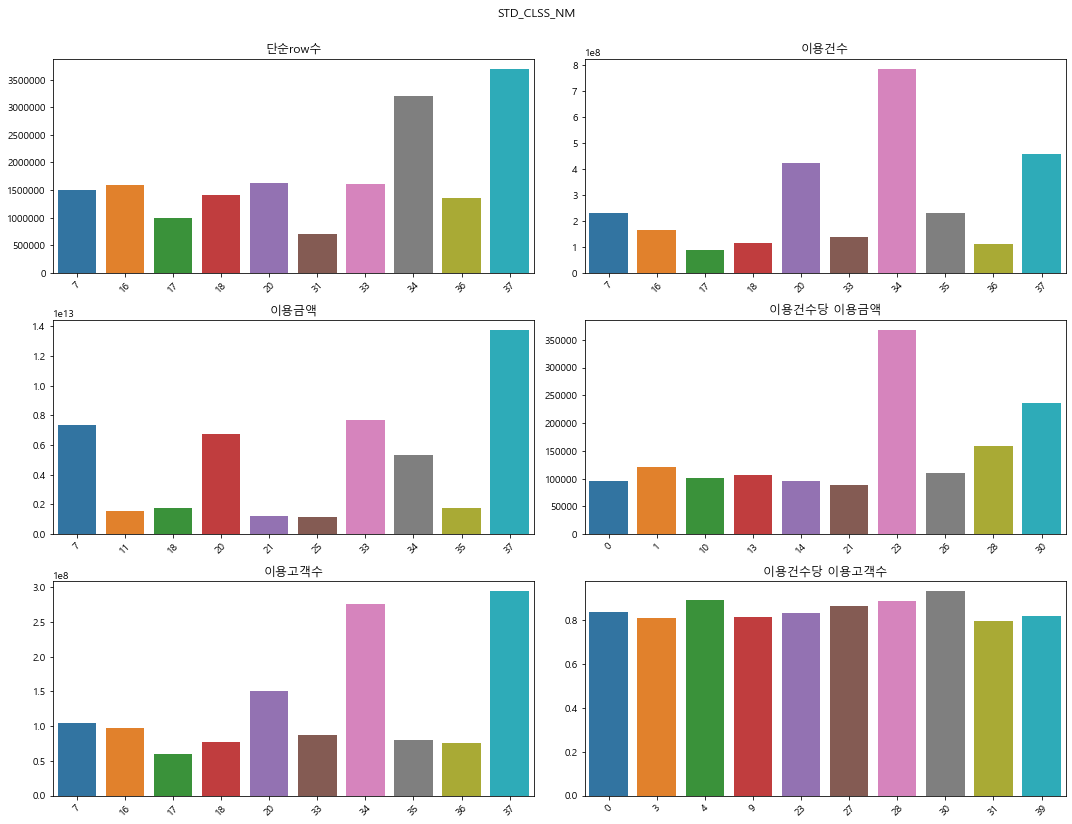

In [7]:
# 34 :면세점, 37, 기타수상오락서비스업의 건수가 높은편, 20 - 일반 유흥 주점업 또 높음 
# 건당 비용은 23 : 중식 음식점이 높고 30- 화장품 및 방향제 소매업이 높음
#
draw_eda_graph("STD_CLSS_NM",10)

### 계절적 변동이 있는지 확인

In [8]:
train['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(train.STD_CLSS_NM)

In [9]:
class_amt = train.pivot_table(index='STD_CLSS_NM',columns = 'REG_YYMM',values='AMT',aggfunc='sum')
class_cnt = train.pivot_table(index='STD_CLSS_NM',columns = 'REG_YYMM',values='CNT',aggfunc='sum')

MemoryError: Unable to allocate 1.10 GiB for an array with shape (6, 24697792) and data type object

##### 상관계수로 두변수 연관성 측정

In [ ]:
import scipy.stats as stats

# 피어슨 상관계수 검정
i = 6
corr = stats.pearsonr(class_amt.iloc[i], class_cnt.iloc[i])
corr

In [ ]:
sns.scatterplot(x = class_amt.iloc[i], y = class_cnt.iloc[i])

In [ ]:
class_per = class_amt/class_cnt

### 정규분포를 따르는지 확인
* 20년 포함
* 활용??? 100이라도 곱해서 사용하나? 이걸 어떻게 쓰지?

In [ ]:
from scipy.stats import shapiro
p_values =[]
corrs = []
for i in range(len(class_per)): 
    corrs.append(shapiro(class_per.iloc[i])[0])
    p_values.append(shapiro(class_per.iloc[i])[1])

In [ ]:
p_values = pd.Series(p_values)

out_index= p_values[p_values<0.05].index.values

#정규분포를 따르지않는 업종들
class_per.index[out_index]

In [ ]:
for i in out_index:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.distplot(class_per.iloc[i])
    plt.subplot(1,2,2)
    sp.stats.probplot(class_per.iloc[i], plot=plt)
    p_value = shapiro(class_per.iloc[i])[1]
    plt.title(f"{class_per_19.index[i]},{p_value}")
    plt.show()

### 20년 제외
* 20년을 제외해도 해당업종들은 정규분포를 따르지 않음

In [ ]:
class_per_19 = class_per.iloc[:,:-3]

In [ ]:
from scipy.stats import shapiro
p_values =[]
for i in range(len(class_per_19)): 
    p_values.append(shapiro(class_per_19.iloc[i])[1])

In [ ]:
p_values = pd.Series(p_values)

out_index= p_values[p_values<0.05].index.values

#정규분포를 따르지않는 업종들
class_per.index[out_index]

In [ ]:
shapiro(class_per.iloc[i])[1]

In [ ]:
for i in out_index:
    sns.distplot(class_per_19.iloc[i])
    p_value = shapiro(class_per.iloc[i])[1]
    plt.title(f"{class_per_19.index[i]},{p_value}")
    plt.show()

In [ ]:
i = 2
plt.hist(abs(class_per.iloc[i] -class_per.iloc[i].mean()))

### 지역적변동이 있는지 확인(시군구)
* 20년 포함
* 지역별로 관계가 있는것으로 추정

In [ ]:
class_amt = train.pivot_table(index=['CARD_SIDO_NM','CARD_CCG_NM','STD_CLSS_NM'],columns = 'REG_YYMM',values='AMT',aggfunc='sum').reset_index()
class_cnt = train.pivot_table(index=['CARD_SIDO_NM','CARD_CCG_NM','STD_CLSS_NM'],columns = 'REG_YYMM',values='CNT',aggfunc='sum').reset_index()

class_per = class_amt.iloc[:,3:]/class_cnt.iloc[:,3:]
class_per = pd.concat([class_amt.iloc[:,:3],class_per],axis = 1)

In [ ]:
p_values =[]
for i in range(len(class_per)): 
    sample = class_per.iloc[i,3:].dropna()
    try :
        p_values.append(shapiro(sample)[1])
    except : 
        p_values.append(np.nan)

In [ ]:
p_values = pd.Series(p_values)
index_nan = p_values[p_values.isna()].index
index_out = p_values[p_values<0.05].index

In [ ]:
#특정지역의 특정업종(184건)은 데이터가 없음 
#시군구단위의 위험성 
class_per.loc[index_nan]

In [ ]:
#전체업종과 달리 육류소매업은 정규성을 안따름
class_per.loc[index_out].STD_CLSS_NM.value_counts()

In [ ]:
class_per[class_per.STD_CLSS_NM == '육류 소매업']

### 20년제외

In [ ]:
class_per_19 = class_per.iloc[:,:-3]

In [ ]:
p_values =[]
for i in range(len(class_per_19)): 
    sample = class_per_19.iloc[i,3:].dropna()
    try :
        p_values.append(shapiro(sample)[1])
    except : 
        p_values.append(np.nan)

p_values = pd.Series(p_values)
# index_nan = p_values[p_values.isna()].index
index_out_19 = p_values[p_values<0.05].index

In [ ]:
class_per.loc[index_out].STD_CLSS_NM.value_counts().head(15)

In [ ]:
class_per_19.loc[index_out_19].STD_CLSS_NM.value_counts().head(15)

In [ ]:
class_per.STD_CLSS_NM.unique()

### 지역변동있는지 확인(시도)

In [ ]:
class_amt = train.pivot_table(index=['CARD_SIDO_NM','STD_CLSS_NM'],columns = 'REG_YYMM',values='AMT',aggfunc='sum').reset_index()
class_cnt = train.pivot_table(index=['CARD_SIDO_NM','STD_CLSS_NM'],columns = 'REG_YYMM',values='CNT',aggfunc='sum').reset_index()

class_per = class_amt.iloc[:,2:]/class_cnt.iloc[:,2:]
class_per = pd.concat([class_amt.iloc[:,:2],class_per],axis = 1)

In [ ]:
class_per

In [ ]:
p_values =[]
for i in range(len(class_per)): 
    sample = class_per.iloc[i,3:].dropna()
    try :
        p_values.append(shapiro(sample)[1])
    except : 
        p_values.append(np.nan)

p_values = pd.Series(p_values)
index_nan = p_values[p_values.isna()].index
index_out = p_values[p_values<0.05].index

In [ ]:
#8건 nan가 많음
class_per.loc[index_nan]

In [ ]:
#육류, 소매업, 일식 정규성을 따르지 않음
class_per.loc[index_out]['STD_CLSS_NM'].value_counts()